In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
tr = pd.read_csv(r"C:\Users\GASTO\Downloads\website_data.csv")

In [126]:
tr.head()

,traffic
0,932
1,929
2,938
3,964
4,990


In [127]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


<Axes: >

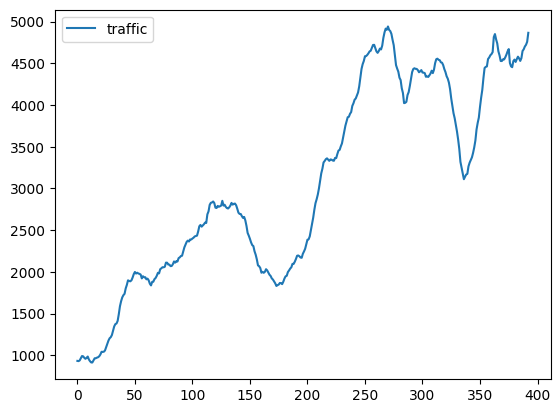

In [128]:
tr.plot()

from these we can see that variance is nit constant throughout time that is from 0_50 the variance is less while from 250-400 the variance is more

<Axes: >

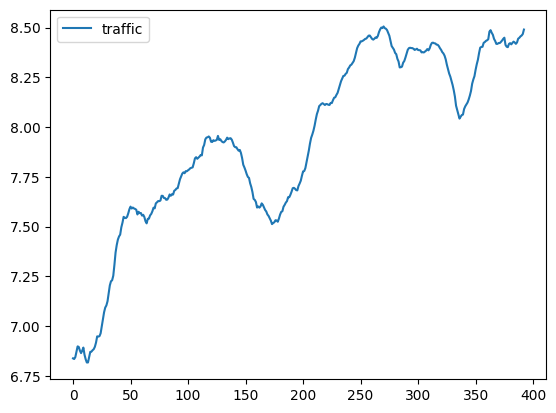

In [129]:
tr=np.log(tr)
tr.plot()

observation is that the plot has less variance as compared to before

In [130]:
len(tr)

393

In [131]:
size = int(len(tr) * 0.7)
size

275

In [132]:
df_train=tr.iloc[:size]
df_test=tr.iloc[size:]

In [133]:
print(df_train.shape)
print(df_test.shape)

(275, 1)
(118, 1)


# check for stationarity

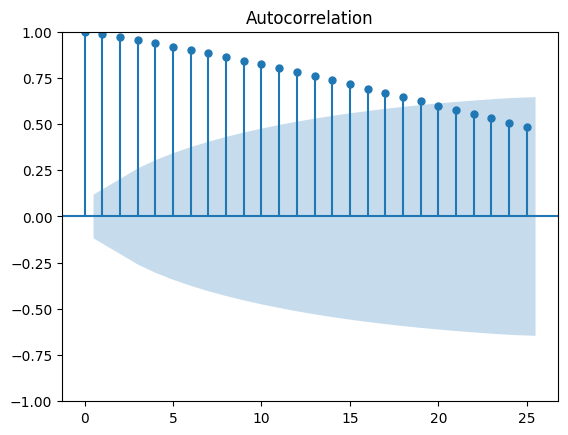

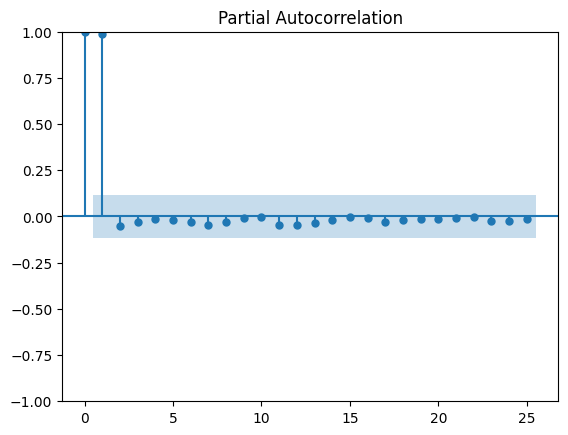

In [134]:
# Acf and PACF plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_original=plot_acf(df_train)
pacf_original=plot_pacf(df_train)


- the ACF shows that the correlation of the lags are high and positive with very slow decay.

- the PACF   show a single spike at lag one  showing a random block (non stationary)

# statistical test ADF


In [135]:
from statsmodels.tsa.stattools import adfuller
adf_test= adfuller(df_train)
print(f'ADF statistics:{adf_test[0]}')
print(f'p_value:{adf_test[1]}')
print(f'Critical values:{adf_test[4]}')

ADF statistics:-2.2705089281336157
p_value:0.18165587454972154
Critical values:{'1%': np.float64(-3.455952927706342), '5%': np.float64(-2.8728086526320302), '10%': np.float64(-2.572774990685656)}


- the result shows a larger p_value  hence its a unit_root(non_stationary)meaning fail to reject the null hypothesis.

- also looking at the adf-test you can see that the value is less negative that the critical value meaning its greater than the critical value hence  we fail to reject the null hypothesis.

- adf-stat>critical value ...fail to reject the null hypothesis(unit root -non stationarity)

# Transforming to stationality : differencing

<Axes: >

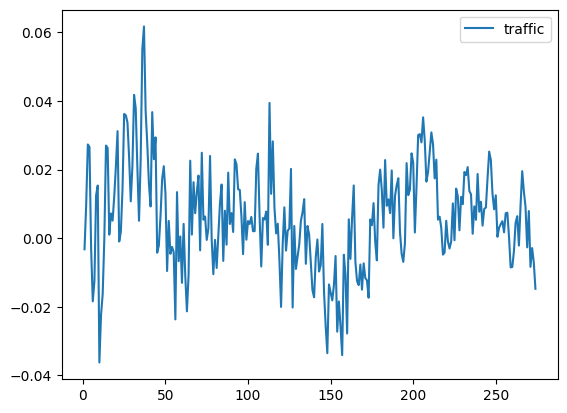

In [136]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

the trend shows that the first differencing time series doesn't show  a strong trend anymore looking more stationary

ACF AND PACF PLOTS

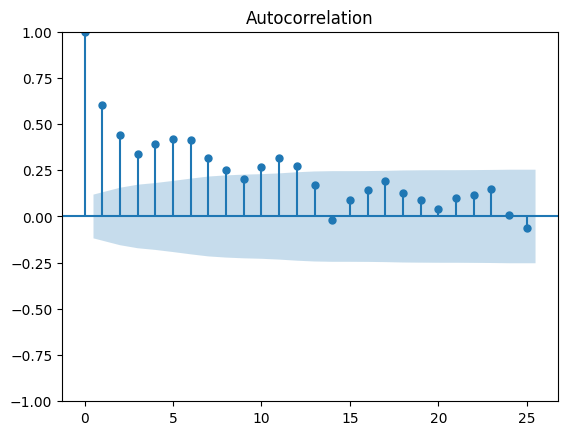

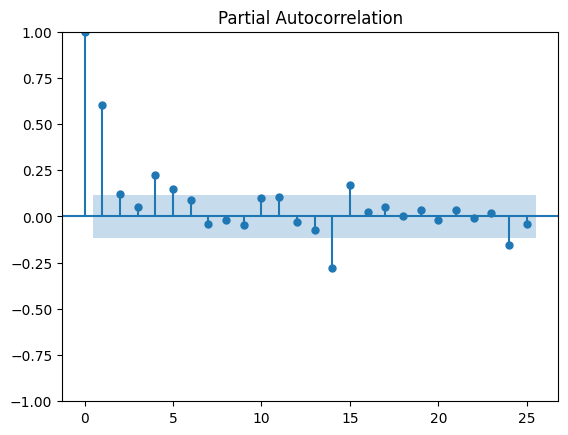

In [137]:
acf_diff= plot_acf(df_train_diff)
pacf_dff=plot_pacf(df_train_diff)

acf plot drops in value more quickly and pacf shows a less spike lag at lag 1 showing that the series is stationary

# adf test :stationarity

In [138]:
adf_test=adfuller(df_train_diff)
print(f'Adf stat:{adf_test[0]}')
print(f'p_value:{adf_test[1]}')
print(f'critical value:{adf_test[4]}')

Adf stat:-2.890477614964123
p_value:0.04646657967169732
critical value:{'1%': np.float64(-3.4558530692911504), '5%': np.float64(-2.872764881778665), '10%': np.float64(-2.572751643088207)}


- adf<5% and10%  critical value so you reject the null hypothesis and say it stationary that is constant mean, std.

- our p_value is less than 0.05 hence we reject the null hypothesis hence this creating  more concrete resuits that our data is stationary at critical level 5&10%

- in conclusion our first differencing term in time series of our data is stationary

# 2nd differencing

<Axes: >

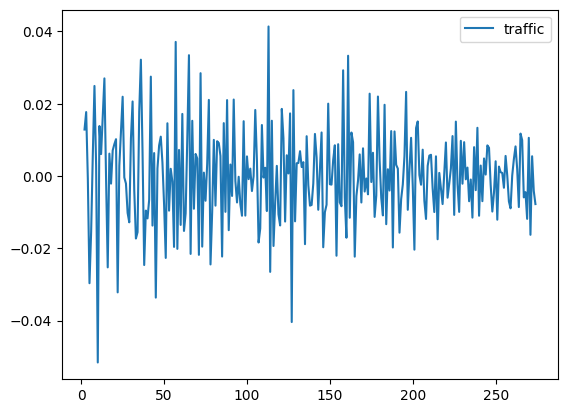

In [139]:
df_train2_diff=df_train_diff.diff().dropna()
df_train2_diff.plot()

the 2nd differencing doesn't show any trend hence stationary

# ACF and PACF plots

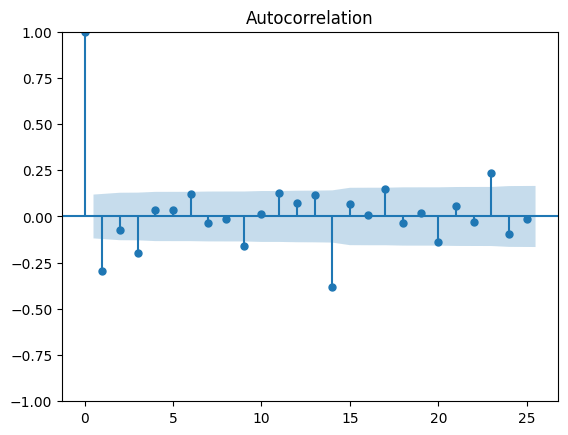

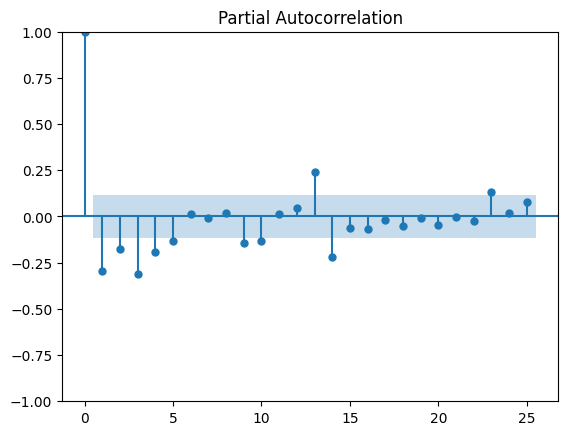

In [140]:
acf_diff2=plot_acf(df_train2_diff)
pacf_dff2=plot_pacf(df_train2_diff)

# adf test

In [141]:
adf_test2=adfuller(df_train2_diff)
print(f'ADF statistic:{adf_test2[0]}')
print(f'p_value:{adf_test2[1]}')
print(F'Critical value:{adf_test2[4]}')

ADF statistic:-5.281305150667269
p_value:5.985619261850892e-06
Critical value:{'1%': np.float64(-3.455952927706342), '5%': np.float64(-2.8728086526320302), '10%': np.float64(-2.572774990685656)}


- adf_stat< critical values hence we reject the null hypothesis and say that our data is stationary.

- p_value is less than 0.05 therefore data is non_unit root(stationary)

- to conclude our differencing of 2 seems to be the best to show that our data is stationary at all critical levels ie.1%,5%,10%

#  Determimng ARIMA model parameter p.q

In [145]:
# fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df_train,order=(8,2,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  275
Model:                 ARIMA(8, 2, 1)   Log Likelihood                 828.312
Date:                Thu, 22 Aug 2024   AIC                          -1636.624
Time:                        11:24:22   BIC                          -1600.529
Sample:                             0   HQIC                         -1622.134
                                - 275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0811      0.703     -0.115      0.908      -1.458       1.296
ar.L2         -0.1842      0.350     -0.526      0.599      -0.871       0.502
ar.L3         -0.2916      0.299     -0.976      0.3

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


the model was not significant as our p_values were above 0.05 hence the model was performing poorly

In [146]:
model=ARIMA(df_train,order=(1,2,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  275
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 823.437
Date:                Thu, 22 Aug 2024   AIC                          -1640.873
Time:                        11:24:43   BIC                          -1630.045
Sample:                             0   HQIC                         -1636.526
                                - 275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3377      0.080      4.224      0.000       0.181       0.494
ma.L1         -0.8427      0.047    -17.780      0.000      -0.936      -0.750
sigma2         0.0001   1.06e-05     13.266      0.0

In [148]:
model = ARIMA(df_train, order=(3, 2, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  275
Model:                 ARIMA(3, 2, 1)   Log Likelihood                 827.312
Date:                Thu, 22 Aug 2024   AIC                          -1644.623
Time:                        11:28:44   BIC                          -1626.576
Sample:                             0   HQIC                         -1637.379
                                - 275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0988      0.102      0.969      0.333      -0.101       0.299
ar.L2         -0.1361      0.065     -2.080      0.038      -0.264      -0.008
ar.L3         -0.2404      0.074     -3.259      0.0

our model never performed well indicated by our p_values that are above 0.05 in the case of ar.l1

In [150]:
model3 = ARIMA(df_train, order=(5, 2, 0))
model_fit = model3.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  275
Model:                 ARIMA(5, 2, 0)   Log Likelihood                 827.789
Date:                Thu, 22 Aug 2024   AIC                          -1643.578
Time:                        11:42:30   BIC                          -1621.921
Sample:                             0   HQIC                         -1634.884
                                - 275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5094      0.063     -8.025      0.000      -0.634      -0.385
ar.L2         -0.3896      0.074     -5.278      0.000      -0.534      -0.245
ar.L3         -0.4214      0.067     -6.267      0.0

log_likelihood shld alwalys move towards zero a better model.

- (5,2,0) is the best model since our p _value are below 0.05  showing a better performance.

check if the model has captured adequate information from our data using the residuals

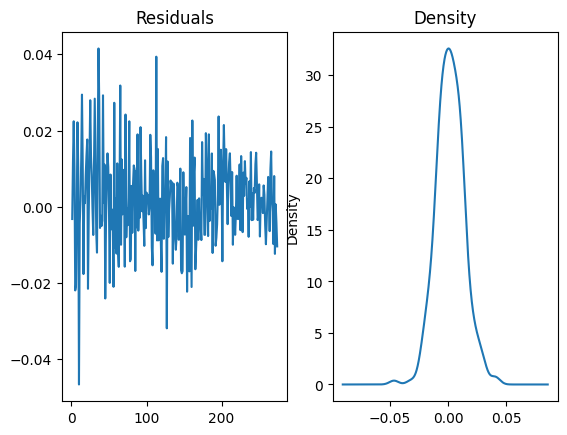

In [111]:
residuals = model_fit.resid[1:]
fig, ax=plt.subplots(1,2)
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

residuals look random in general and the density is normally distributed with mean around zero.

# ACF  and PACF plots of residuals

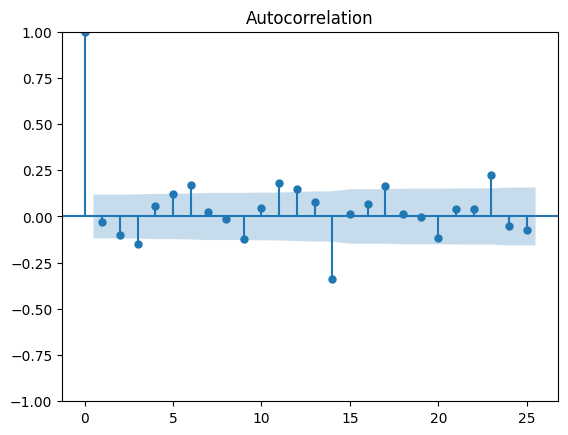

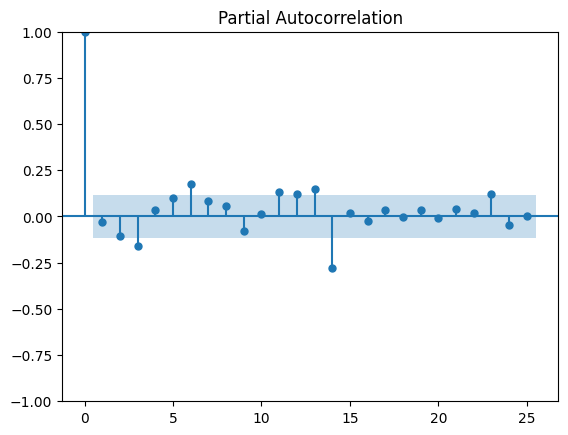

In [112]:
acf_reds=plot_acf(residuals)
pacf_reds=plot_pacf(residuals)

# forecasting

In [151]:
start=len(df_train2_diff)
end=len(df_train2_diff)+len(df_test)-1
predictions=model_fit.predict(start=start,end=end,typ='levels')

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


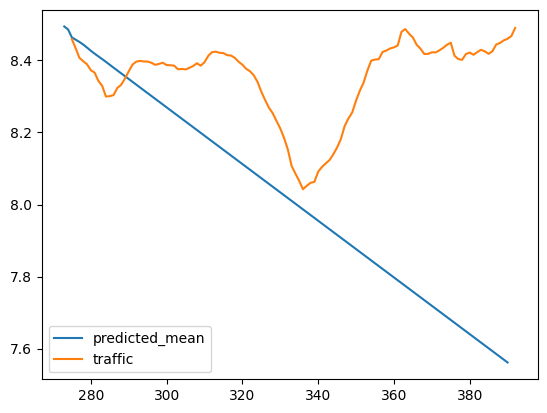

In [152]:
predictions.plot(legend=True)
df_test['traffic'].plot(legend=True)
plt.show()

In [158]:
from sklearn.metrics import mean_squared_error

In [157]:
mse=mean_squared_error(df_test,predictions)
print(f'mean squared error:{mse}')

mean squared error:0.20036500756652748


# auto arima

<Axes: >

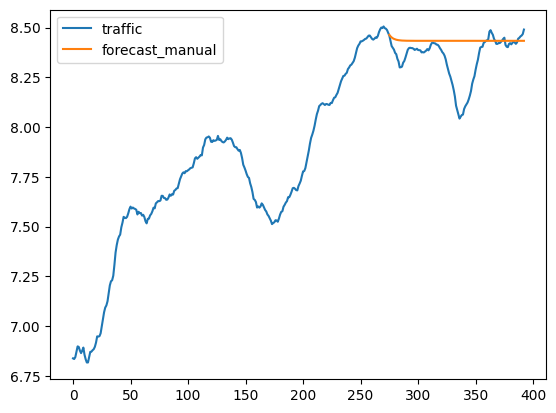

In [113]:
forecast_test=model_fit.forecast(len(df_test))
tr['forecast_manual']=[None]*len(df_train)+list(forecast_test)
tr.plot()

#  Trying a new model

 -trying a new model with AR(2),MA(2)

In [119]:
model = ARIMA(df_train, order=(2, 2, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  275
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 806.013
Date:                Wed, 21 Aug 2024   AIC                          -1606.025
Time:                        19:32:14   BIC                          -1595.197
Sample:                             0   HQIC                         -1601.678
                                - 275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3527      0.058     -6.110      0.000      -0.466      -0.240
ar.L2         -0.1773      0.062     -2.838      0.005      -0.300      -0.055
sigma2         0.0002   1.25e-05     12.728      0.0

# Drawing the residuals

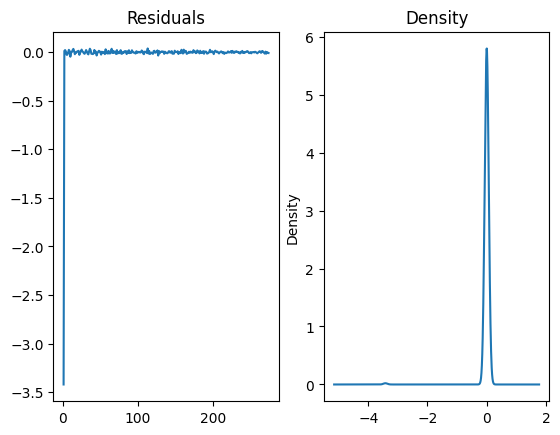

In [122]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(title="Density", kind="kde", ax=ax[1])
plt.show()

# ACF and PACF plots

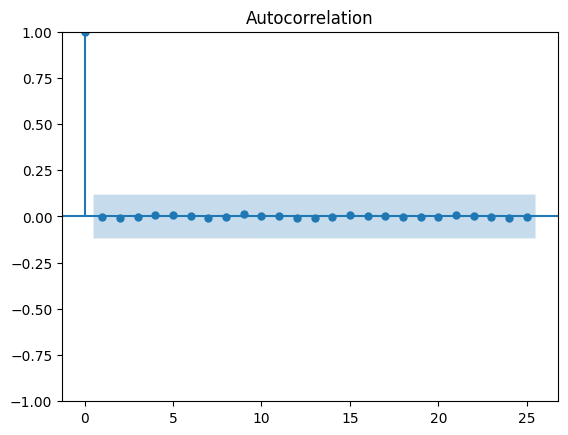

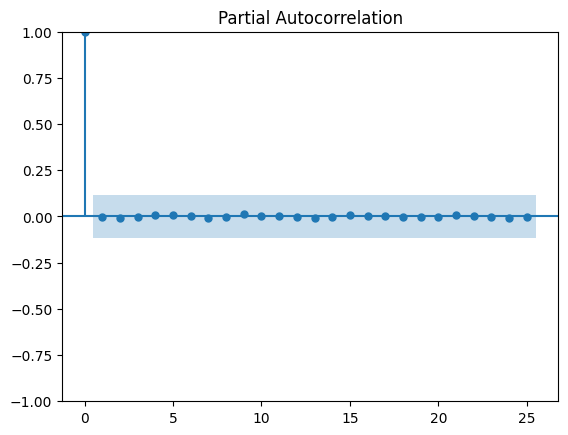

In [120]:
acf_reds = plot_acf(residuals)
pacf_reds = plot_pacf(residuals)

# Forecasting via drawing

<Axes: >

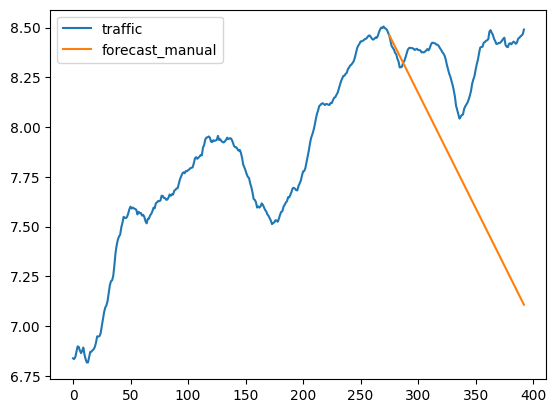

In [118]:
forecast_test = model_fit.forecast(len(df_test))
tr["forecast_manual"] = [None] * len(df_train) + list(forecast_test)
tr.plot()

arima of (2,2,0) indicates a down trend as the future forecast